# M5 Machine Learning Pt. 1

This notebook will explore the ability of different machine learning (multiple linear regression, polynomial regression, and random forest) to predict rain rate from the provided polarised radar dataset. 

The rwequired modules foro this notebook is `sklearn`

### 1. Data preparation (load, process, and split the data)

In [44]:
# import modules

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
# load the dataset

df = pd.read_csv('homework/radar_parameters.csv', parse_dates=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18969 entries, 0 to 18968
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18969 non-null  int64  
 1   Zh (dBZ)        18969 non-null  float64
 2   Zdr (dB)        18969 non-null  float64
 3   Ldr (dB)        18969 non-null  float64
 4   Kdp (deg km-1)  18969 non-null  float64
 5   Ah (dBZ/km)     18969 non-null  float64
 6   Adr (dB/km)     18969 non-null  float64
 7   R (mm/hr)       18969 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [46]:
# drop unwanted column

df.drop('Unnamed: 0', axis=1, inplace=True)


In [47]:
# check the data properties 

df.describe()

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
count,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000
mean,31.294021,0.762979,-37.969272,0.080879,0.001829,0.000234,7.855561
std,6.496330,0.363489,3.277391,0.221018,0.003469,0.000822,8.569413
min,14.036426,0.285207,-44.849249,0.000697,0.000044,0.000002,0.309399
25%,26.720145,0.489184,-40.573505,0.011537,0.000482,0.000027,3.072614
50%,31.020280,0.677804,-38.113140,0.028640,0.000977,0.000069,5.622457
75%,35.597165,0.947020,-35.601404,0.073099,0.001970,0.000182,9.622175
max,57.400639,3.843941,-25.373718,5.060710,0.082511,0.027538,195.557062


In [48]:
# drop any rows with null values

df.dropna(axis=0, how='any', inplace=True)

column_names = ['Zh (dBZ)', 'Zdr (dB)', 'Ldr (dB)', 'Kdp (deg km-1)', 'Ah (dBZ/km)', 'Adr (dB/km)']

X = df[column_names]  # hyperparameters
y = df['R (mm/hr)'] # target

In [49]:
# split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=0.7)                                               

### 2. Multiple Linear Regression

In [50]:
# train the model use training dataset created from number 1

from sklearn.linear_model import LinearRegression

mod_regres = LinearRegression(fit_intercept=True)
mod_regres.fit(X_train, y_train)

LinearRegression()

In [51]:
# apply model for test data set 

R_lin_regres = mod_regres.predict(X_test)

In [52]:
# calculate r2 score for multiple linear regression

r2_lin_regres_train = r2_score(y_test.ravel(), R_lin_regres)
rmse_lin_regres_train  = np.sqrt(mean_squared_error(y_test.ravel(), R_lin_regres))

In [57]:
# calculate Z value from the given dBZ data
# and adding to the data

R_baseline = (10 ** (X_test['Zh (dBZ)']/10)/200) ** (1/1.6)


In [58]:
# calculate r2 score of the available rain rate and rain rate from baseline equation

r2_baseline = r2_score(y_test.ravel(), R_baseline)
rmse_baseline  = np.sqrt(mean_squared_error(y_test.ravel(), R_baseline))

In [59]:
# print and compare both models

print('R2 Multiple Linear Regression = ' + str(round(r2_lin_regres_train, 5)))
print('R2 Baseline = ' + str(round(r2_baseline, 5)))
print()
print('RMSE Multiple Linear Regression = ' + str(round(rmse_lin_regres_train, 5)) + ' mm/hr')
print('RMSE Baseline = ' + str(round(rmse_baseline, 5)) + ' mm/hr')

R2 Multiple Linear Regression = 0.98686
R2 Baseline = 0.22661

RMSE Multiple Linear Regression = 0.95836 mm/hr
RMSE Baseline = 7.35239 mm/hr


#### Answer
Multiple linear regression outperfoms the baseline model using low-power equation in terms of $R^2$ and RMSE. 

### 3. Grid Search over Polynomials orders and cross-validation

In [60]:
# import module and define the model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=np.arange(10), **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [61]:
# set the hyperparameter and cross validation for polinom model

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)


In [ ]:
# train the model with train dataset

grid.fit(X_train, y_train)

![lin_regress](figures/grid-search_polinom.png)

In [ ]:
# save the fitted random forest model 

import joblib

add_dir = '../backup/model/'
filename = 'finalized_mod_polinom_10.sav'
joblib.dump(grid, add_dir+filename)

In [62]:
# open the saved GS polynom model 

import joblib

add_dir = '../backup/model/'
filename = 'finalized_mod_polinom_10.sav'
grid_polinom = joblib.load(add_dir + filename)

In [63]:
# get information of best parameter

grid_polinom.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [ ]:
# set the model with best estimator
mod_polinom = grid_polinom.best_estimator_

# run the model with trained data
R_grid_poli = mod_polinom.fit(X_train, y_train).predict(X_test)

In [65]:
# calculate r2 score for multiple linear regression

r2_grid_poli = r2_score(y_test.ravel(), R_grid_poli)
rmse_grid_poli  = np.sqrt(mean_squared_error(y_test.ravel(), R_grid_poli))

In [66]:
# print the statistical of built-models and compare them

print('R2 Multiple Linear Regression = ' + str(round(r2_lin_regres_train, 5)))
print('R2 Baseline = ' + str(round(r2_baseline, 5)))
print('R2 GS Polynomial Regression = ' + str(round(r2_grid_poli, 5)))
print()
print('RMSE Multiple Linear Regression = ' + str(round(rmse_lin_regres_train, 5)) + ' mm/hr')
print('RMSE Baseline = ' + str(round(rmse_baseline, 5)) + ' mm/hr')
print('RMSE GS Polynomial Regression = ' + str(round(rmse_grid_poli, 5)) + ' mm/hr')

R2 Multiple Linear Regression = 0.98686
R2 Baseline = 0.22661
R2 GS Polynomial Regression = 0.99943

RMSE Multiple Linear Regression = 0.95836 mm/hr
RMSE Baseline = 7.35239 mm/hr
RMSE GS Polynomial Regression = 0.19891 mm/hr


### Answer 
GS Polynomial Regression performs better than previous built-models, yet it required a lot of computation time. This could be the setting of cross-validation. 

### 4. Random Forest Regressor

In [67]:
# import module

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# create list of each hyper-parameter

n_estimators_list = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_features_list = ['auto', 'sqrt']
max_depth_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
bootstrap_list = [True, False]


In [68]:
# structure model hyper-params as a dictionary

rf_grid = {'n_estimators': n_estimators_list,
           'max_features': max_features_list,
           'max_depth': max_depth_list,
           'min_samples_split': min_samples_split_list,
           'min_samples_leaf': min_samples_leaf_list,
           'bootstrap': bootstrap_list}

In [69]:
# reate base LGBM model

rf_base = RandomForestRegressor(random_state=42)

In [70]:
# create random search for LGBM model

rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_grid, 
                                 n_iter=100, cv=7, verbose=2, random_state=42, 
                                 n_jobs=-1)

In [ ]:
%%time
# fit the random search LGBM model

rf_random.fit(X_train, y_train)

![rf-progressor](figures/rf-progressor.png)

In [ ]:
# save the fitted random forest model 

import joblib

add_dir = '../backup/model/'
filename = 'finalized_model_rf_random_search_iter100.sav'
joblib.dump(rf_random, add_dir + filename)

In [73]:
# restore the saved random forest model 

import joblib

add_dir = '../backup/model/'
filename = 'finalized_model_rf_random_search_iter100.sav'
rf_random = joblib.load(add_dir + filename)

In [74]:
# get optimal hyper-params

rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [75]:
# get score of best model during hyper-param tuning

rf_random.best_score_

0.9779460891289645

In [24]:
# train model using optimal hyper-parameters from above steps

mod_rf = RandomForestRegressor(**rf_random.best_params_, random_state=42)

In [76]:
# fit the best rf model to train dataset

mod_rf.fit(X_train, y_train)

/Users/fsari2/miniconda3/envs/py3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=50, max_features='auto', n_estimators=200,
                      random_state=42)

In [77]:
# predict R using rf model 

R_rf = mod_rf.predict(X_test)

In [79]:
# calculate r2 score for random forest model

r2_rf = r2_score(y_test.ravel(), R_rf)
rmse_rf  = np.sqrt(mean_squared_error(y_test.ravel(), R_rf))


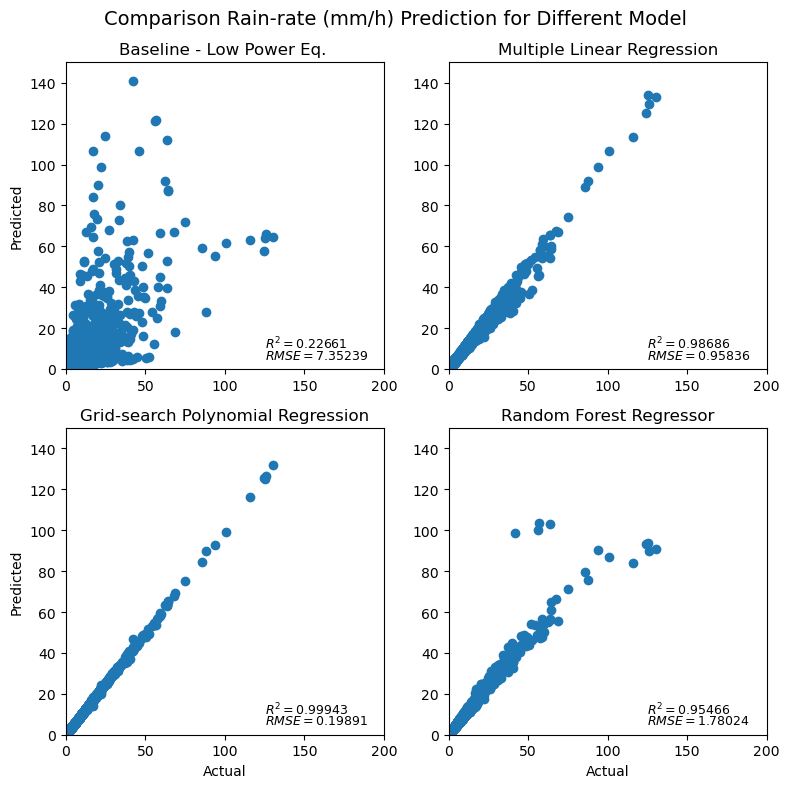

In [80]:
# visual;ize the data on scatter plot
# set size and subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.suptitle('Comparison Rain-rate (mm/h) Prediction for Different Model', fontsize=14)

# visualize 
axes[0,0].scatter(y_test, R_baseline)
axes[0,1].scatter(y_test, R_lin_regres)
axes[1,0].scatter(y_test, R_grid_poli)
axes[1,1].scatter(y_test, R_rf)

# set title fro each subplots
axes[0,0].set_title("Baseline - Low Power Eq. ")
axes[0,1].set_title("Multiple Linear Regression")
axes[1,0].set_title("Grid-search Polynomial Regression")
axes[1,1].set_title("Random Forest Regressor")

# set the outer axis label for subplots
plt.setp(axes[-1, :], xlabel='Actual')
plt.setp(axes[:, 0], ylabel='Predicted')

# set all the axis limit
plt.setp(axes, ylim=(0, 150))
plt.setp(axes, xlim=(0, 200))

# show r2 and rmse on subplots
axes[0,0].text(125, 10, '$R^2 =$' + str (round(r2_baseline, 5)), fontsize=9)
axes[0,0].text(125, 5, '$RMSE =$' + str (round(rmse_baseline, 5)), fontsize=9)

axes[0,1].text(125, 10, '$R^2 =$' + str (round(r2_lin_regres_train, 5)), fontsize=9)
axes[0,1].text(125, 5, '$RMSE =$' + str (round(rmse_lin_regres_train, 5)), fontsize=9)

axes[1,0].text(125, 10, '$R^2 =$' + str (round(r2_grid_poli, 5)), fontsize=9)
axes[1,0].text(125, 5, '$RMSE =$' + str (round(rmse_grid_poli, 5)), fontsize=9)

axes[1,1].text(125, 10, '$R^2 =$' + str (round(r2_rf, 5)), fontsize=9)
axes[1,1].text(125, 5, '$RMSE =$' + str (round(rmse_rf, 5)), fontsize=9)

fig.tight_layout()
plt.show()

### Answer 
Among all built-models, GS Polynomial Regression perform best both for $R^2$ and RMSE. The randomized RF model consumed more computation time but it did not worth for the accuracy. 